In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기
train_data = pd.read_csv('./data/sign_mnist_train.csv')
test_data = pd.read_csv('./data/sign_mnist_test.csv')

# 라벨 분리하기
train_label = train_data['label']
test_label = test_data['label']

# 이미지 데이터 분리하기
train_data = train_data.drop('label', axis=1)
test_data = test_data.drop('label', axis=1)

# numpy 배열로 변환하기
train_data = np.array(train_data)
test_data = np.array(test_data)
train_label = np.array(train_label)
test_label = np.array(test_label)

In [4]:
# 클래스 개수
num_classes = 25

# 입력 이미지 크기
input_shape = (28, 28, 1)

# 이미지 데이터 정규화
train_data = train_data.reshape(train_data.shape[0], *input_shape) / 255.0
test_data = test_data.reshape(test_data.shape[0], *input_shape) / 255.0

# 라벨 데이터 one-hot encoding
train_label = tf.keras.utils.to_categorical(train_label, num_classes)
test_label = tf.keras.utils.to_categorical(test_label, num_classes)


In [5]:
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
]
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [6]:
# 위 코드에서는 총 5개의 레이어를 사용하여 모델을 만들었습니다. 
# 첫 번째 레이어는 3x3 크기의 커널을 가지는 32개의 필터를 사용하고, 
# 입력 이미지의 크기를 (28, 28, 1)로 지정합니다. 
# 이후에는 MaxPooling 레이어를 사용하여 이미지를 줄여나갑니다. 
# 이어서 3x3 크기의 커널을 가지는 64개의 필터를 사용하는 Conv2D 레이어를 추가합니다. 
# 다시 한 번 MaxPooling 레이어를 사용하여 이미지를 줄입니다. 
# 그리고 Flatten 레이어를 사용하여 2차원 이미지를 1차원으로 바꾼 후에 Dropout 레이어를 추가합니다. 
# 마지막으로 Dense 레이어를 사용하여 출력을 생성합니다.

# 이제 모델을 컴파일하고 학습시켜보겠습니다.


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_data, train_label, batch_size=128, epochs=20, validation_split=0.1)


Epoch 1/20
194/194 [==============================] - 6s 27ms/step - loss: 2.0284 - accuracy: 0.4149 - val_loss: 0.7535 - val_accuracy: 0.8015
Epoch 2/20
194/194 [==============================] - 6s 30ms/step - loss: 0.6712 - accuracy: 0.7915 - val_loss: 0.3361 - val_accuracy: 0.9144
Epoch 3/20
194/194 [==============================] - 6s 30ms/step - loss: 0.3719 - accuracy: 0.8828 - val_loss: 0.1560 - val_accuracy: 0.9818
Epoch 4/20
194/194 [==============================] - 6s 29ms/step - loss: 0.2405 - accuracy: 0.9249 - val_loss: 0.0837 - val_accuracy: 0.9931
Epoch 5/20
194/194 [==============================] - 6s 32ms/step - loss: 0.1671 - accuracy: 0.9494 - val_loss: 0.0517 - val_accuracy: 0.9960
Epoch 6/20
194/194 [==============================] - 6s 32ms/step - loss: 0.1273 - accuracy: 0.9613 - val_loss: 0.0293 - val_accuracy: 0.9993
Epoch 7/20
194/194 [==============================] - 6s 31ms/step - loss: 0.0980 - accuracy: 0.9714 - val_loss: 0.0257 - val_accuracy: 0.9993

In [7]:
# 학습이 완료되면, 테스트 데이터를 사용하여 모델의 정확도를 평가.
test_loss, test_acc = model.evaluate(test_data, test_label)
print("Test accuracy:", test_acc)

225/225 [==============================] - 1s 4ms/step - loss: 0.2306 - accuracy: 0.9396
Test accuracy: 0.9396263360977173


In [8]:
from PIL import Image

In [9]:
x_img=Image.open('./data//O.jpg')

In [10]:
x_img.size

(4000, 3000)

In [11]:
x_img=x_img.resize((28,28))

In [12]:
x_img=x_img.convert('L')

In [13]:
x_img=x_img.rotate(angle=-90)

In [14]:
x_img

In [15]:
x_array=np.array(x_img)

In [16]:
x_img.close()

In [17]:
x_array.shape

(28, 28)

In [18]:
x_array= x_array.reshape(1,28,28,1)

In [19]:
result=model.predict(x_array)

1/1 [==============================] - 0s 99ms/step


In [20]:
result.shape

(1, 25)

In [21]:
result

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
result.argmax(-1)

array([6], dtype=int64)

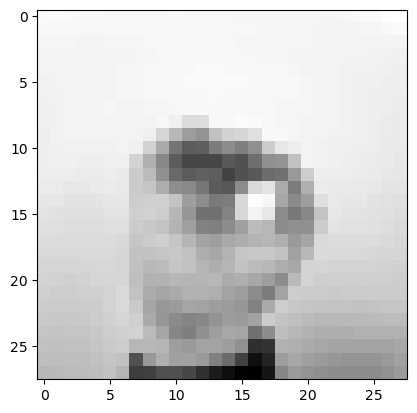

In [23]:
plt.imshow(x_array.reshape(28,28,1),cmap='gray')

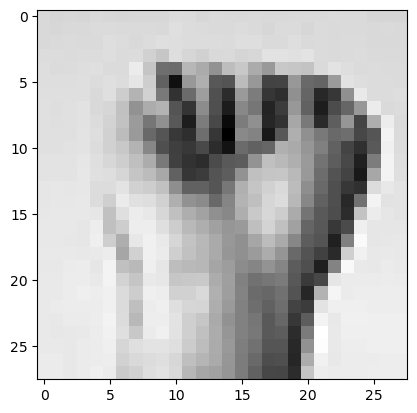

In [24]:
df = pd.read_csv('./data/sign_mnist_train.csv')
sample = df[df['label']==0]
len(sample)
sample_array = sample.iloc[0,1:].values
sample_array = sample_array.reshape(28,28,1)
plt.imshow(sample_array,cmap='gray')